<AxesSubplot:>

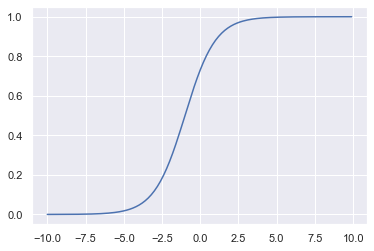

In [3]:
import numpy as np
import seaborn as sns

sns.set()

def sigmoid(x):
    return 1/(1+np.exp(-x))

a=1
b=1

xs=np.arange(-10,10,0.1)
ys=sigmoid(a*xs+b)

sns.lineplot(x=xs,y=ys)

In [5]:
import pandas as pd
df=pd.read_csv("../data/Diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(len(df))

768


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X=df[["BMI","Age"]]
y=df["Outcome"]

X_train, X_test, y_train, y_test =train_test_split(X,y, train_size=0.75)
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [8]:
print(model.predict(X_test))

[1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0]


In [9]:
print(model.score(X_test,y_test))

0.6979166666666666


In [10]:
model.predict_proba(X_test)

array([[0.17657831, 0.82342169],
       [0.88664283, 0.11335717],
       [0.55070102, 0.44929898],
       [0.5157143 , 0.4842857 ],
       [0.59798853, 0.40201147],
       [0.58792393, 0.41207607],
       [0.63135248, 0.36864752],
       [0.79667511, 0.20332489],
       [0.41061263, 0.58938737],
       [0.325185  , 0.674815  ],
       [0.21707296, 0.78292704],
       [0.80305783, 0.19694217],
       [0.84906039, 0.15093961],
       [0.50377217, 0.49622783],
       [0.98525796, 0.01474204],
       [0.62044801, 0.37955199],
       [0.21133546, 0.78866454],
       [0.38351242, 0.61648758],
       [0.45549348, 0.54450652],
       [0.54414044, 0.45585956],
       [0.34760181, 0.65239819],
       [0.84411922, 0.15588078],
       [0.7024823 , 0.2975177 ],
       [0.81518316, 0.18481684],
       [0.65756666, 0.34243334],
       [0.82923756, 0.17076244],
       [0.47874932, 0.52125068],
       [0.67342052, 0.32657948],
       [0.89156409, 0.10843591],
       [0.5567183 , 0.4432817 ],
       [0.

## Fehlerarten

### Confusion Matrix

In [11]:
y_test_pred=model.predict(X_test)

In [12]:
y_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [15]:
confusion_matrix(y_test, y_test_pred)

array([[113,  23],
       [ 35,  21]])

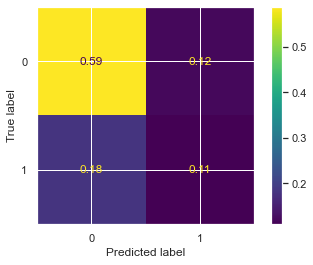

In [17]:
plot_confusion_matrix(model, X_test, y_test, normalize="all")

## Precision und Recal

#### Recall niedrig bei Gerichturteilen, hoch bei Krebserkrankungen (lieber eine zu wenig diagnistizieren als zu wneig) //Quantität optomierung
#### Precision hoch bei Gerichturteilen,niedrig bei Krebserkrankungen //Qualitiät optomierung

In [22]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [20]:
recall_score(y_test,y_test_pred)

0.375

In [23]:
precision_score(y_test,y_test_pred)

0.4772727272727273

## Klassen unterschiedlich gewichten


precision: 0.6724137931034483
recall: 0.5492957746478874


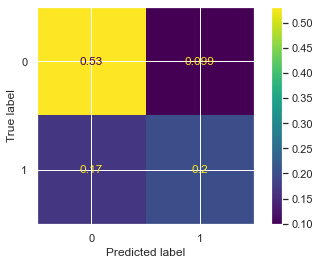

In [33]:
df=pd.read_csv("../data/Diabetes/diabetes.csv")
X=df[["BMI","Age","Glucose","BloodPressure"]]
y=df["Outcome"]

X_train, X_test, y_train, y_test =train_test_split(X,y, train_size=0.75)
model= LogisticRegression(class_weight={0:1,1:1})  # weights are put into the class weight
model.fit(X_train,y_train)



y_test_pred=model.predict(X_test)
precision=precision_score(y_test,y_test_pred)
recall=recall_score(y_test, y_test_pred)

print("precision:", str(precision))
print("recall:", str(recall))  #recall 1 wird bedeuten dass alle kranken einen positiven test ergebniss 
#bekommen werden, allerdings viele gesunden auch(wenn die precission niedrig ist)

plot_confusion_matrix(model, X_test,y_test, normalize="all")

In [28]:
##die unterschieldichne Gewichte kann mann auch dann verwenden wenn wir unbalansierte klassen haben:

df.groupby("Outcome").agg(c=("Age",len))

,c
Outcome,
0,500
1,268


In [29]:
#eg: class_weight={0:1/500,1:1/268} oder class_weight="balaced"

In [30]:
####another way, we can say that a probablility of higher than 30%is signifikant

In [35]:
model.predict_proba(X_test)[:,1]>=0.3

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False, False,  True,
       False, False,